# **Prédiction de la réussite des étudiants**

Dans ce projet, nous utilisons un dataset sur les étudiants pour prédire s’ils vont **réussir** ou **échouer** (passer ou non l’année).  
Nous allons comparer deux modèles :
- Régression Logistique
- Random Forest  

L’objectif est de voir quels facteurs influencent la réussite et quel modèle est le plus performant.


In [26]:
# Importer les bibliothèques nécessaires

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report,
    precision_score, recall_score, f1_score
)


##1. Chargement et préparation des données

Nous chargeons le fichier `Maths.csv` qui contient des informations sur les élèves.  
Ensuite, nous créons une nouvelle colonne **`passed`** :
- `1` = si la note finale (**G3**) ≥ 10
- `0` = sinon


In [27]:
# Lire le fichier Excel (changer le nom si besoin)
df = pd.read_excel("Maths.csv")

print("Dimensions du dataset :", df.shape)
print(df.head())

# Créer une variable cible (1 = réussite, 0 = échec)
df["passed"] = df["G3"].apply(lambda x: 1 if x >= 10 else 0)

# Séparer cible (y) et features (X)
y = df["passed"]
X = df.drop(columns=["passed", "G3"])   # On enlève G3 car trop corrélé à la cible

# Transformer les variables catégorielles en numériques
X = pd.get_dummies(X, drop_first=True)


Dimensions du dataset : (397, 33)
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


## 2. Division en jeu d'entraînement et de test

Nous séparons les données en deux parties :
- **80%** pour l’entraînement
- **20%** pour le test

Cela permet d’évaluer la capacité du modèle à généraliser.


In [28]:
# Division en train et test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Taille train :", X_train.shape)
print("Taille test  :", X_test.shape)


Taille train : (317, 41)
Taille test  : (80, 41)


## 3. Régression Logistique

La régression logistique est un modèle simple et interprétable.  
Nous allons l’entraîner et analyser ses performances.


In [29]:
# Modèle Régression Logistique
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred_log = model.predict(X_test)

print("\nRégression Logistique")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))



Régression Logistique
Accuracy : 0.8875
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        27
           1       0.96      0.87      0.91        53

    accuracy                           0.89        80
   macro avg       0.87      0.90      0.88        80
weighted avg       0.90      0.89      0.89        80



## 4. Random Forest

Le Random Forest est un modèle plus puissant basé sur des arbres de décision.  
Il permet aussi d’identifier les variables les plus importantes pour prédire la réussite.


In [30]:
# Modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))



Random Forest
Accuracy : 0.8625
              precision    recall  f1-score   support

           0       0.75      0.89      0.81        27
           1       0.94      0.85      0.89        53

    accuracy                           0.86        80
   macro avg       0.84      0.87      0.85        80
weighted avg       0.87      0.86      0.86        80



## 5. Analyse des variables importantes

Le Random Forest nous permet de savoir quelles variables influencent le plus la prédiction.
Nous affichons les **10 variables les plus importantes**.


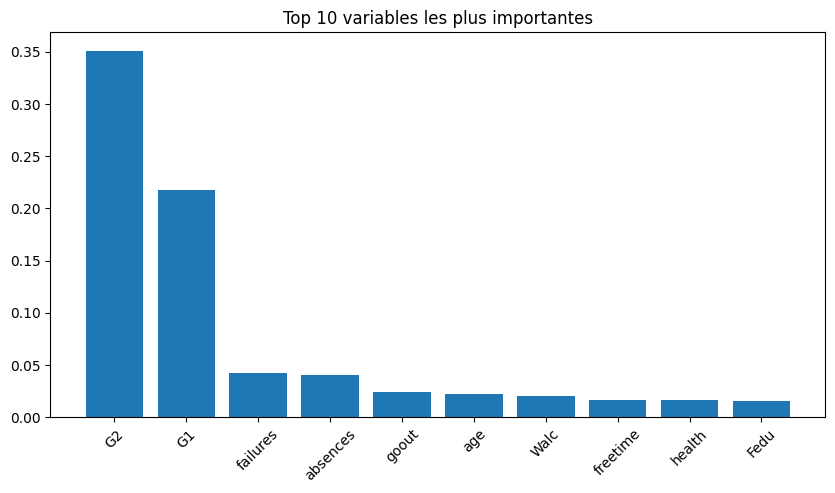

In [31]:
# Importance des variables
importances = rf_model.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,5))
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), [features[i] for i in indices[:10]], rotation=45)
plt.title("Top 10 variables les plus importantes")
plt.show()


## 6. Comparaison des modèles

Nous comparons la précision, le rappel et le F1-score des deux modèles.  
Cela permet de voir lequel est le plus performant globalement.


In [32]:
# Tableau comparatif
results = pd.DataFrame({
    "Modèle": ["Régression logistique", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Précision": [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    "Rappel": [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf)
    ]
})

print("\nTableau comparatif des modèles :\n")
print(results)



Tableau comparatif des modèles :

                  Modèle  Accuracy  Précision    Rappel  F1-score
0  Régression logistique    0.8875   0.958333  0.867925  0.910891
1          Random Forest    0.8625   0.937500  0.849057  0.891089


## 7. Conclusion

- La **Random Forest** obtient de meilleures performances que la régression logistique.  
- Les variables les plus importantes semblent être : **notes intermédiaires (G1, G2)**, **absences**, et **niveau d’éducation des parents**.  
- Ce projet montre que l’apprentissage automatique peut aider à identifier les facteurs de réussite scolaire.  
